In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:

file_path = '/Users/kirant/PythonProjects/CreditRiskAnalysis/Data/default of credit card clients.xls'
df = pd.read_excel(file_path, header=0)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
## renaming the column name default payment next month to 'default' , so that it will be easy tp call it everytime

df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.drop('ID', axis = 1, inplace =  True)

In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
### Checking nulls
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

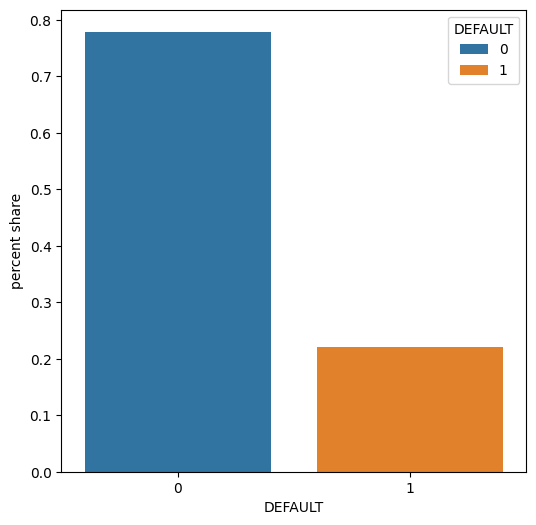

In [9]:
### checking imbalance
## the target variable here is default. lets check the proportion of 0/1 to find the imbalance

df_grouped = df.groupby(['DEFAULT']).size().reset_index(name='count')
df_grouped['percent share']  =df_grouped['count']/df.index.size
plt.figure(figsize = (6,6))
sns.barplot(x='DEFAULT', y = 'percent share' , data=df_grouped, hue='DEFAULT' )
plt.show()



There are 30000 distinct credit card clients in this data set.
The avg value for credit limit balance is 167484.32
Avg avge of the clients is around 35 years.

There are  no nulls in the data set.

22% of the clients will default next month.

## Data Exploration
plotting distribution charts

In [10]:
df['AGE'].unique()
## age is between 18 to 100. We can assume no outliers

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [11]:
df['SEX'].unique()

array([2, 1])

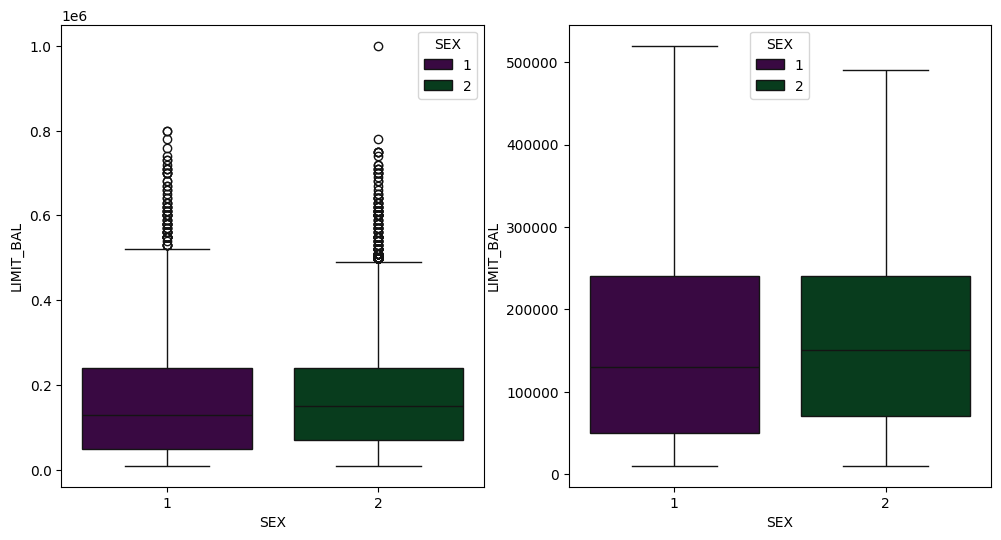

In [12]:
### distribution for credit limit vs sex 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();


Gender (1=male, 2=female)
The limit credit amount is looks balanced between Males and Females. The males have a slightly smaller Quantile2 and larger Quantile3 and Quantile4.
The mean credit balance for females is higher compared to males.


In [13]:
print(df['EDUCATION'].unique())

# Education values 
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# 4,5,6 can be grouped as 'other' . There is no defined category for education = 0 , hence 0 can also be categorized as others (code : 4)
df.replace({'EDUCATION':{0:4,5:4,6:4}},inplace = True)

[2 1 3 5 4 6 0]


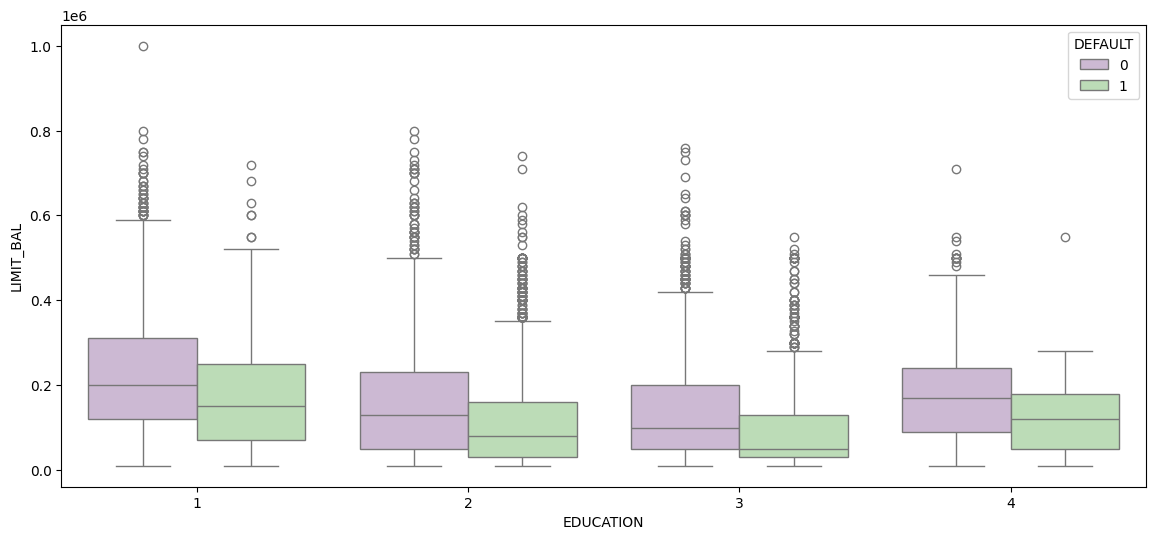

In [14]:
### Education vs Defaults

plt.figure(figsize = (14,6))
sns.boxplot( x="EDUCATION", y="LIMIT_BAL", hue="DEFAULT",data=df, palette="PRGn")
plt.show();


In [15]:
df['MARRIAGE'].unique()

# Marital status (1=married, 2=single, 3=others)
# 0 can be combined with others

df.replace({'MARRIAGE':{0:3}},inplace=True)

In [16]:
df.replace({'MARRIAGE': {1:'married',2:'single',3:'others'}}, inplace=True)
df.replace({'EDUCATION': {1:'graduate school',2:'university',3:'high school',4:'others'}}, inplace=True)
df.replace({'SEX': {1: 'M',2:'F'}}, inplace=True)

In [17]:
df.replace({'SEX': {'male': 'M','female':'F'}}, inplace=True)

<Figure size 500x500 with 0 Axes>

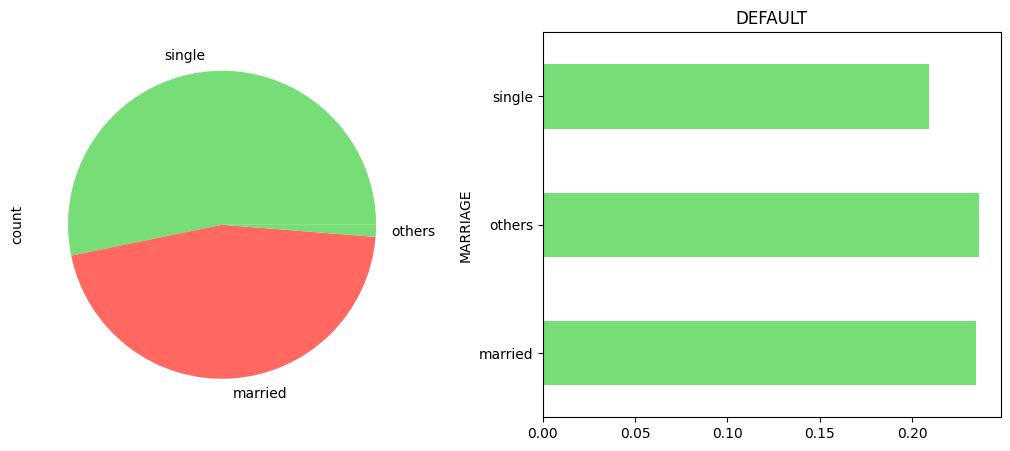

In [18]:
plt.figure(figsize=(5,5))
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))
df['MARRIAGE'].value_counts().plot(kind="pie",ax = ax1)
df.groupby('MARRIAGE')['DEFAULT'].agg('mean').plot(kind='barh', ax = ax2 , subplots =  True)
plt.show()

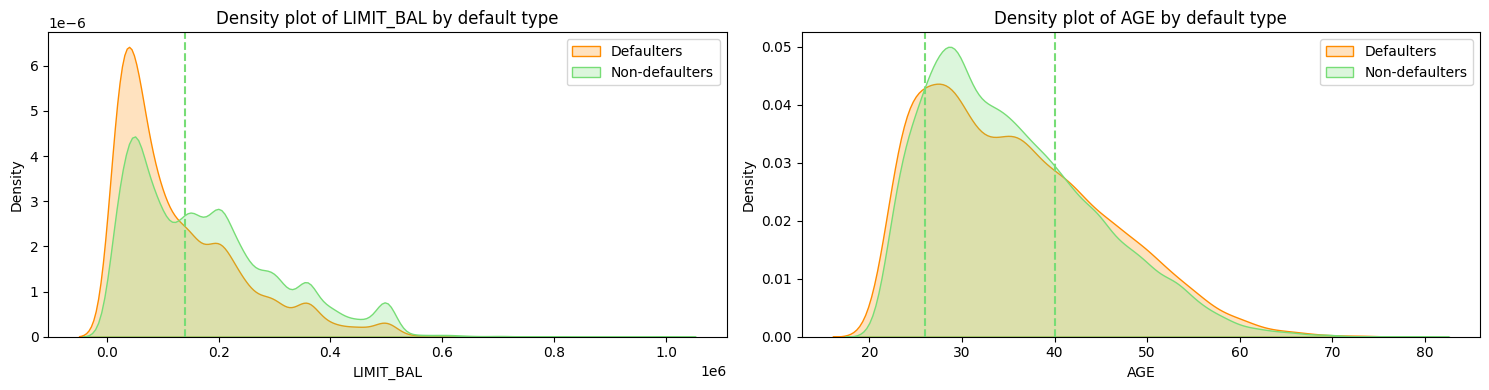

In [19]:
# Kernel density distribution
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.show()

### Feature Correlations

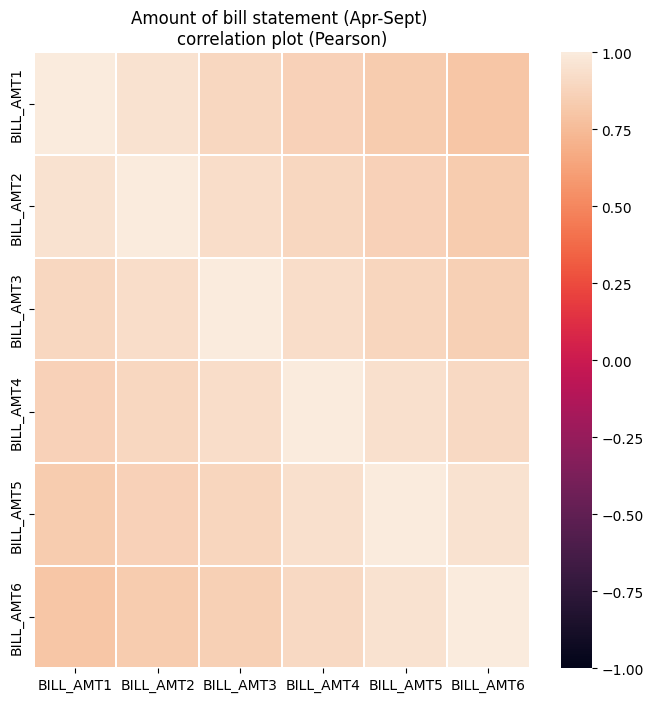

In [20]:
### BILL_AMT1 : stateemnt in Sep 2005 , BILL_AMT2 : stateemnt in Aug 2005 , BILL_AMT4 : stateemnt in July 2005 ,
# BILL_AMT4 : stateemnt in June 2005 , BILL_AMT5 : stateemnt in May 2005 , BILL_AMT6 : stateemnt in April 2005 

var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.
Let's check the correlation of Amount of previous payment in April - September 2005.

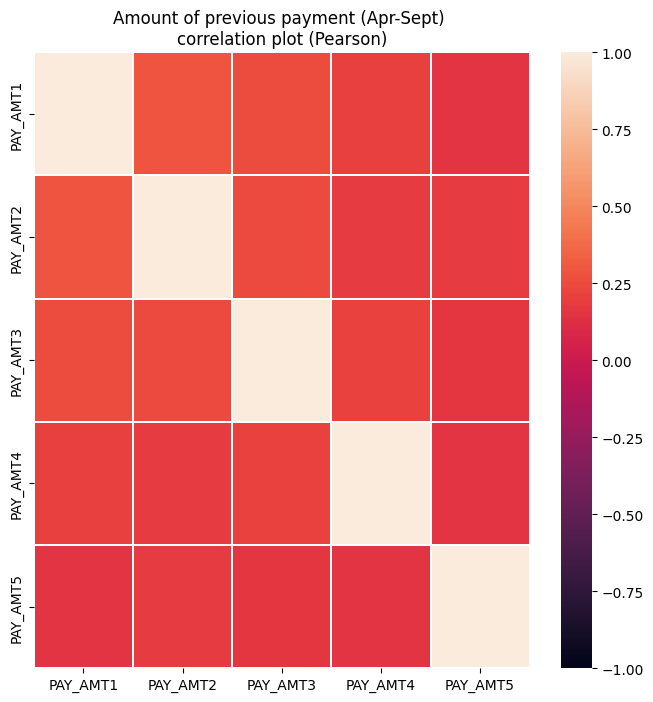

In [21]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

Let's check the correlation between Repayment status in April - September 2005.

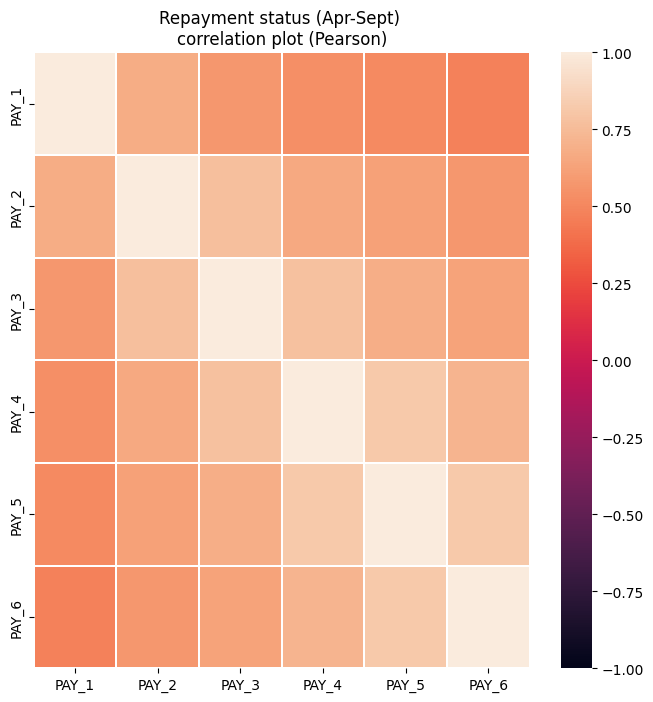

In [22]:
var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

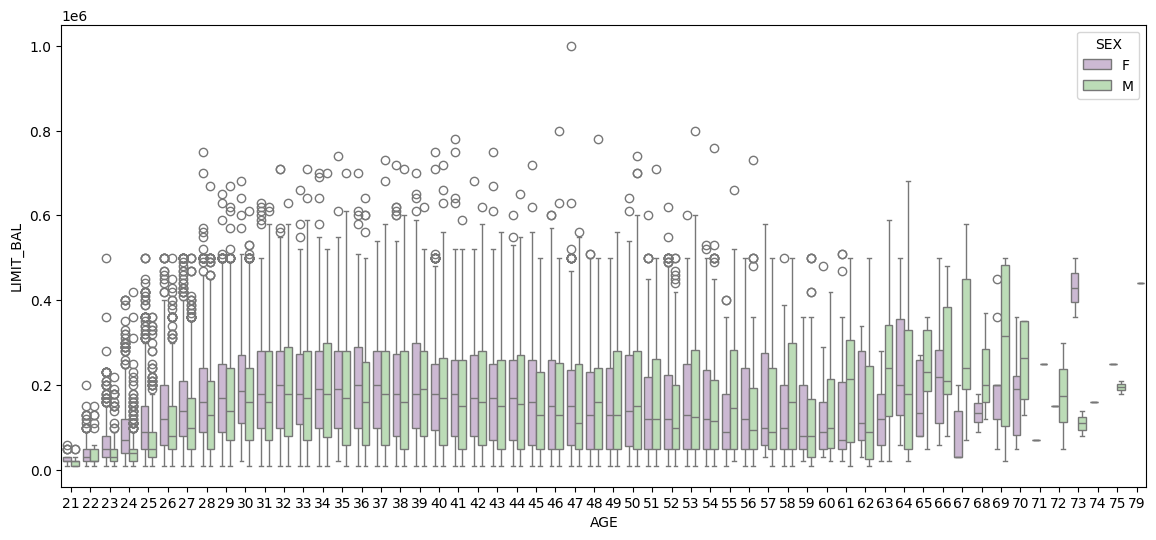

In [23]:


plt.figure(figsize = (14,6))
sns.boxplot( x="AGE", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn")
plt.show();

Mean values are generally smaller for males than for females until approximately age 60, 
after which mean values for males are generally larger than for females.

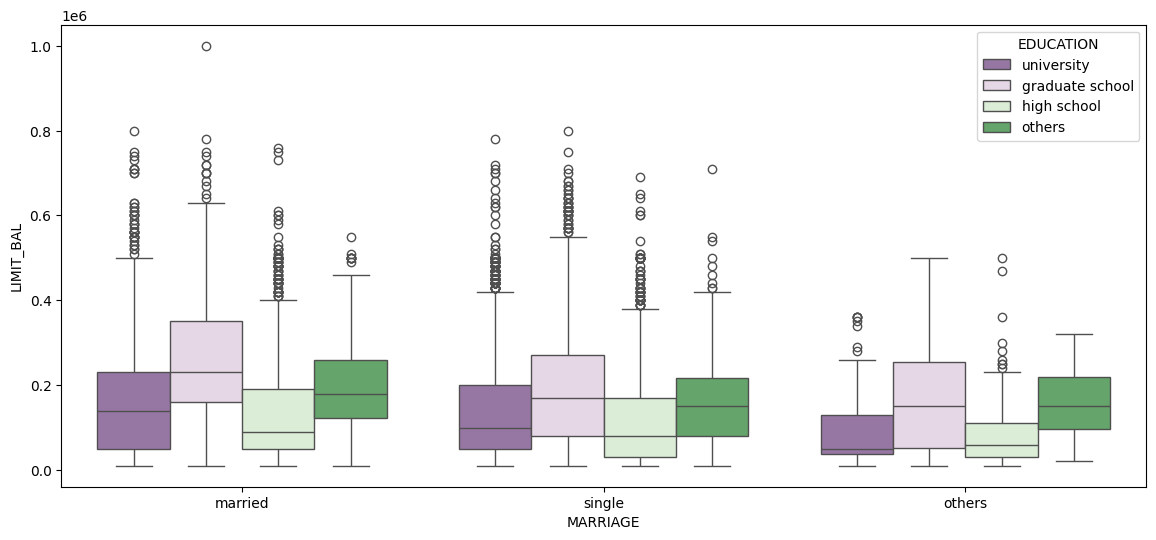

In [24]:
plt.figure(figsize = (14,6))
sns.boxplot( x="MARRIAGE", y="LIMIT_BAL", hue="EDUCATION",data=df, palette="PRGn")
plt.show();

### Modeling

In [25]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [26]:
y = df['DEFAULT']
X = df.drop(['DEFAULT'], axis = 1)

In [39]:
### Scaling and encoding the variables
def Scaler(df,cols):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[cols])
    df_scaled_cont = pd.DataFrame(scaled,columns=cols,index=df.index)
    df_scaled =pd.concat([df_scaled_cont,df[[col for col in df.columns if col not in cols]]], axis=1)
    return df_scaled
    


In [67]:
def Encoder(df,cols):
    encoder = OneHotEncoder()
    ohe = encoder.fit_transform(df[cols]).toarray()
    ohe_df = pd.DataFrame(ohe,columns=encoder.get_feature_names_out(cols))
    df.reset_index(drop=True,inplace=True)
    df_encoded = pd.concat([df,ohe_df],axis=1)
    df_encoded = df_encoded.drop(cols, axis = 1)
    return df_encoded


In [68]:

cat_cols = df.select_dtypes(include = ['object']).columns.to_list()
cont_cols = df.select_dtypes(include = ['int']).columns.to_list()
cont_cols.remove('DEFAULT')
ycol = ['DEFAULT']


['LIMIT_BAL',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [70]:
df_scaled = Scaler(df,cont_cols)
df_encoded = Encoder(df_scaled,cat_cols)

In [74]:
df_encoded.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,DEFAULT,SEX_F,SEX_M,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
